# IMPORTANT ! :
# DO NOT RUN ALL CELLS TO AVOID OVVERIDE SOME FILES ,
# READ CAREFULLY THE CELL BEFORE EXECUTING IT 

In [52]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import os
# import matplotlib.pyplot as plt
# from fbprophet import Prophet
import warnings

warnings.simplefilter(action='ignore')
import math

In [53]:
from fbprophet import Prophet

In [54]:
data = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
data.head()

Province/State  Country/Region      Lat      Long       Date  Confirmed  \
0          Anhui  Mainland China  31.8257  117.2264 2020-01-22          1   
1        Beijing  Mainland China  40.1824  116.4142 2020-01-22         14   
2      Chongqing  Mainland China  30.0572  107.8740 2020-01-22          6   
3         Fujian  Mainland China  26.0789  117.9874 2020-01-22          1   
4          Gansu  Mainland China  36.0611  103.8343 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11985 entries, 0 to 11984
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  7285 non-null   object        
 1   Country/Region  11985 non-null  object        
 2   Lat             11985 non-null  float64       
 3   Long            11985 non-null  float64       
 4   Date            11985 non-null  datetime64[ns]
 5   Confirmed       11985 non-null  int64         
 6   Deaths          11985 non-null  int64         
 7   Recovered       11985 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 749.2+ KB


In [56]:
data['Province/State'] = data['Province/State'].fillna('NA')

In [57]:
data.isna().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [58]:
data.groupby(['Country/Region','Province/State']).groups

{('Afghanistan',
  'NA'): Int64Index([   82,   337,   592,   847,  1102,  1357,  1612,  1867,  2122,
              2377,  2632,  2887,  3142,  3397,  3652,  3907,  4162,  4417,
              4672,  4927,  5182,  5437,  5692,  5947,  6202,  6457,  6712,
              6967,  7222,  7477,  7732,  7987,  8242,  8497,  8752,  9007,
              9262,  9517,  9772, 10027, 10282, 10537, 10792, 11047, 11302,
             11557, 11812],
            dtype='int64'),
 ('Algeria',
  'NA'): Int64Index([   85,   340,   595,   850,  1105,  1360,  1615,  1870,  2125,
              2380,  2635,  2890,  3145,  3400,  3655,  3910,  4165,  4420,
              4675,  4930,  5185,  5440,  5695,  5950,  6205,  6460,  6715,
              6970,  7225,  7480,  7735,  7990,  8245,  8500,  8755,  9010,
              9265,  9520,  9775, 10030, 10285, 10540, 10795, 11050, 11305,
             11560, 11815],
            dtype='int64'),
 ('Andorra',
  'NA'): Int64Index([  121,   376,   631,   886,  1141,  1396,  1651,

In [59]:
#removing others which just contains a travelubg ship that was infected 
data = data[data['Country/Region']!='Others']

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11938 entries, 0 to 11984
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  11938 non-null  object        
 1   Country/Region  11938 non-null  object        
 2   Lat             11938 non-null  float64       
 3   Long            11938 non-null  float64       
 4   Date            11938 non-null  datetime64[ns]
 5   Confirmed       11938 non-null  int64         
 6   Deaths          11938 non-null  int64         
 7   Recovered       11938 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 839.4+ KB


In [61]:
data.head()

Province/State  Country/Region      Lat      Long       Date  Confirmed  \
0          Anhui  Mainland China  31.8257  117.2264 2020-01-22          1   
1        Beijing  Mainland China  40.1824  116.4142 2020-01-22         14   
2      Chongqing  Mainland China  30.0572  107.8740 2020-01-22          6   
3         Fujian  Mainland China  26.0789  117.9874 2020-01-22          1   
4          Gansu  Mainland China  36.0611  103.8343 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0

In [62]:
#changing mainland china to china and bousnia
data['Country/Region'] = data['Country/Region'].replace('Mainland China', 'China')
data['Country/Region'] = data['Country/Region'].replace('Bosnia and Herzegovina', 'Bosnia and Her')

In [63]:
data.rename(columns={'Province_State':'State', 'Country_Region':'Region'} ,inplace=True)
data.head(10)

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0          Anhui          China  31.8257  117.2264 2020-01-22          1   
1        Beijing          China  40.1824  116.4142 2020-01-22         14   
2      Chongqing          China  30.0572  107.8740 2020-01-22          6   
3         Fujian          China  26.0789  117.9874 2020-01-22          1   
4          Gansu          China  36.0611  103.8343 2020-01-22          0   
5      Guangdong          China  23.3417  113.4244 2020-01-22         26   
6        Guangxi          China  23.8298  108.7881 2020-01-22          2   
7        Guizhou          China  26.8154  106.8748 2020-01-22          1   
8         Hainan          China  19.1959  109.7453 2020-01-22          4   
9          Hebei          China  38.0428  114.5149 2020-01-22          1   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0  
5       0          0  
6       0          0  
7       0          0  
8       0          0  
9       0          0

In [64]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [65]:
data.rename(columns={"Province/State": "State", "Country/Region": "Region"}, inplace=True)

In [66]:
#last preview 
data.head(10)

State Region      Lat      Long       Date  Confirmed  Deaths  \
0      Anhui  China  31.8257  117.2264 2020-01-22          1       0   
1    Beijing  China  40.1824  116.4142 2020-01-22         14       0   
2  Chongqing  China  30.0572  107.8740 2020-01-22          6       0   
3     Fujian  China  26.0789  117.9874 2020-01-22          1       0   
4      Gansu  China  36.0611  103.8343 2020-01-22          0       0   
5  Guangdong  China  23.3417  113.4244 2020-01-22         26       0   
6    Guangxi  China  23.8298  108.7881 2020-01-22          2       0   
7    Guizhou  China  26.8154  106.8748 2020-01-22          1       0   
8     Hainan  China  19.1959  109.7453 2020-01-22          4       0   
9      Hebei  China  38.0428  114.5149 2020-01-22          1       0   

   Recovered  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0

In [67]:
#grouping data by date for each region and its state
data_grouped = data.groupby(['Region','State','Lat', 'Long', 'Date'],as_index=False)['Confirmed','Deaths', 'Recovered'].max()
data_grouped.head(10)

Region State   Lat  Long       Date  Confirmed  Deaths  Recovered
0  Afghanistan    NA  33.0  65.0 2020-01-22          0       0          0
1  Afghanistan    NA  33.0  65.0 2020-01-23          0       0          0
2  Afghanistan    NA  33.0  65.0 2020-01-24          0       0          0
3  Afghanistan    NA  33.0  65.0 2020-01-25          0       0          0
4  Afghanistan    NA  33.0  65.0 2020-01-26          0       0          0
5  Afghanistan    NA  33.0  65.0 2020-01-27          0       0          0
6  Afghanistan    NA  33.0  65.0 2020-01-28          0       0          0
7  Afghanistan    NA  33.0  65.0 2020-01-29          0       0          0
8  Afghanistan    NA  33.0  65.0 2020-01-30          0       0          0
9  Afghanistan    NA  33.0  65.0 2020-01-31          0       0          0

In [68]:
#Plotly table of the final grouped data
fig1 = go.Figure()
fig1 = go.Figure(data=[go.Table(
    header=dict(values=list(data_grouped.columns),
                align='left'),
    cells=dict(values=[data_grouped.Region, data_grouped.State, data_grouped.Lat, data_grouped.Long,data_grouped.Date,
                      data_grouped.Confirmed,data_grouped.Deaths,data_grouped.Recovered],
               align='left'))
])

fig1.show()

In [69]:
# china_hubei = data_grouped.groupby(['Region','State'],as_index=False)['Date','Confirmed','Deaths', 'Recovered'].get_group(('China','Hubei'))
# china_hubei.head(10)

In [70]:
# fig = go.Figure()
# fig.add_trace(go.Bar(
#     x=china_hubei.Date,
#     y=china_hubei.Confirmed,
#     name='Confirmed',
#     marker_color='lightsalmon'
# ))

# fig.add_trace(go.Bar(
#     x=china_hubei.Date,
#     y=china_hubei.Deaths,
#     name='Deaths',
#     marker_color='indianred'
# ))
# # Here we modify the tickangle of the xaxis, resulting in rotated labels.
# fig.update_layout(barmode='group', xaxis_tickangle=-45)
# fig.show()

In [71]:
#adding "still infected row into the dataframe"

# data_grouped.drop(columns=['still infected'],axis=1,inplace=True)
data_grouped['still infected'] = data_grouped.Confirmed - data_grouped.Deaths - data_grouped.Recovered
data_grouped.tail(10)

Region State   Lat   Long       Date  Confirmed  Deaths  Recovered  \
11928  Vietnam    NA  16.0  108.0 2020-02-28         16       0         16   
11929  Vietnam    NA  16.0  108.0 2020-02-29         16       0         16   
11930  Vietnam    NA  16.0  108.0 2020-03-01         16       0         16   
11931  Vietnam    NA  16.0  108.0 2020-03-02         16       0         16   
11932  Vietnam    NA  16.0  108.0 2020-03-03         16       0         16   
11933  Vietnam    NA  16.0  108.0 2020-03-04         16       0         16   
11934  Vietnam    NA  16.0  108.0 2020-03-05         16       0         16   
11935  Vietnam    NA  16.0  108.0 2020-03-06         16       0         16   
11936  Vietnam    NA  16.0  108.0 2020-03-07         18       0         16   
11937  Vietnam    NA  16.0  108.0 2020-03-08         30       0         16   

       still infected  
11928               0  
11929               0  
11930               0  
11931               0  
11932               0  
11933               0  
11934               0  
11935               0  
11936               2  
11937              14

In [72]:
data_grouped.head()

Region State   Lat  Long       Date  Confirmed  Deaths  Recovered  \
0  Afghanistan    NA  33.0  65.0 2020-01-22          0       0          0   
1  Afghanistan    NA  33.0  65.0 2020-01-23          0       0          0   
2  Afghanistan    NA  33.0  65.0 2020-01-24          0       0          0   
3  Afghanistan    NA  33.0  65.0 2020-01-25          0       0          0   
4  Afghanistan    NA  33.0  65.0 2020-01-26          0       0          0   

   still infected  
0               0  
1               0  
2               0  
3               0  
4               0

In [73]:
temp = data_grouped.groupby('Date',as_index=False)['Confirmed','Deaths', 'Recovered','still infected'].sum()
temp = temp.sort_values('Date',ascending=False)
temp.reset_index(drop=True,inplace=True)
temp.head(1)

Date  Confirmed  Deaths  Recovered  still infected
0 2020-03-08     109140    3797      60655           44688

In [74]:
#colors : 
d = '#ff2e63'
r = '#30e3ca'
i = '#f8b400'
############################
tm = temp.head(1).melt(id_vars="Date", value_vars=['still infected', 'Deaths', 'Recovered'])
tm

Date        variable  value
0 2020-03-08  still infected  44688
1 2020-03-08          Deaths   3797
2 2020-03-08       Recovered  60655

In [75]:
tm['Confirmed'] = 'Confirmed'
tm

Date        variable  value  Confirmed
0 2020-03-08  still infected  44688  Confirmed
1 2020-03-08          Deaths   3797  Confirmed
2 2020-03-08       Recovered  60655  Confirmed

In [76]:
fig = px.treemap(tm, path=["Confirmed","variable"], values="value", height=200)
fig.show()

#World stats

In [77]:
data_grouped.head()

Region State   Lat  Long       Date  Confirmed  Deaths  Recovered  \
0  Afghanistan    NA  33.0  65.0 2020-01-22          0       0          0   
1  Afghanistan    NA  33.0  65.0 2020-01-23          0       0          0   
2  Afghanistan    NA  33.0  65.0 2020-01-24          0       0          0   
3  Afghanistan    NA  33.0  65.0 2020-01-25          0       0          0   
4  Afghanistan    NA  33.0  65.0 2020-01-26          0       0          0   

   still infected  
0               0  
1               0  
2               0  
3               0  
4               0

In [78]:
graph_ww = data_grouped.groupby('Date',as_index=False)['Confirmed','Recovered','Deaths'].sum()

In [79]:
# confimed worldwide cumulative graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=graph_ww.Date, y=graph_ww.Confirmed,
                    mode='lines+markers'))
fig.update_layout(title='Confirmed worldwide cases',
                   xaxis_title='Date',
                   yaxis_title='Confirmed')
fig.show()

In [80]:
# worldwide deaths cumulative graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=graph_ww.Date, y=graph_ww.Deaths,
                    mode='lines+markers'))
fig.update_layout(title='Deaths worldwide cases',
                   xaxis_title='Date',
                   yaxis_title='Deaths')
fig.show()

In [81]:
# worldwide recovered cumulative graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=graph_ww.Date, y=graph_ww.Recovered,
                    mode='lines+markers'))
fig.update_layout(title='Recovered worldwide cases',
                   xaxis_title='Date',
                   yaxis_title='Recovered')
fig.show()

In [82]:
##china data grouped
china = data_grouped.groupby('Region')['State','Lat','Long','Date','Confirmed','Recovered','Deaths','still infected'].get_group('China')
china.head()

State      Lat      Long       Date  Confirmed  Recovered  Deaths  \
1504  Anhui  31.8257  117.2264 2020-01-22          1          0       0   
1505  Anhui  31.8257  117.2264 2020-01-23          9          0       0   
1506  Anhui  31.8257  117.2264 2020-01-24         15          0       0   
1507  Anhui  31.8257  117.2264 2020-01-25         39          0       0   
1508  Anhui  31.8257  117.2264 2020-01-26         60          0       0   

      still infected  
1504               1  
1505               9  
1506              15  
1507              39  
1508              60

In [83]:
china_total = china[['State','Date','Confirmed','Recovered','Deaths','still infected']]
china_total = china_total.groupby(['State'],as_index=False)['Confirmed','Recovered','Deaths','still infected'].sum()
china_total.head()

State  Confirmed  Recovered  Deaths  still infected
0      Anhui      32797      16929     161           15707
1    Beijing      14037       5583     162            8292
2  Chongqing      20017       9495     167           10355
3     Fujian      10438       4909      18            5511
4      Gansu       3311       1974      59            1278

In [84]:
#pie chart but not good looking cuz of huge different between states
fig = go.Figure(data=[go.Pie(labels=china_total.State, values=china_total.Confirmed)])
fig.show()

In [85]:
#fix width and height for design purposes
fig = px.bar(china_total[['State', 'Confirmed']].sort_values('Confirmed', ascending=False), 
             x="Confirmed", y="State", color='State', orientation='h',
             log_x=True, color_discrete_sequence = px.colors.qualitative.Bold, title='Confirmed Cases', width=900, height=800)
fig.show()

In [86]:
#recovered
#fix width and height for design purposes
fig = px.bar(china_total[['State', 'Recovered']].sort_values('Recovered', ascending=False), 
             x="Recovered", y="State", color='State', orientation='h',
             log_x=True, color_discrete_sequence = px.colors.qualitative.Bold, title='Recovered Cases', width=900, height=800)
fig.show()

In [87]:
#deaths
#fix width and height for design purposes
fig = px.bar(china_total[['State', 'Deaths']].sort_values('Deaths', ascending=False), 
             x="Deaths", y="State", color='State', orientation='h',
             log_x=True, color_discrete_sequence = px.colors.qualitative.Bold, title='Deaths Cases', width=900, height=800)
fig.show()

In [88]:
#still infected
#fix width and height for design purposes
fig = px.bar(china_total[['State', 'still infected']].sort_values('still infected', ascending=False), 
             x="still infected", y="State", color='State', orientation='h',
             log_x=True, color_discrete_sequence = px.colors.qualitative.Bold, title='still infected', width=900, height=900)
fig.show()

In [89]:
##function plot line chart time series of a region


In [90]:
# function plot line chart times series status of a state
def LineChartState(state,status):
    df = china.groupby(['State','Date'],as_index=False)['Confirmed','Recovered','Deaths','still infected'].sum()
    s = df.State.drop_duplicates()
    if(state in s.to_numpy() and status in df.columns):
        df1 = df.groupby('State')['Date','Confirmed','Recovered','Deaths','still infected'].get_group(state)
        df1.reset_index(drop=True,inplace=True)
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=df1.Date, y=df1[status],
                    mode='lines+markers'))
        fig.update_layout(title=status+' cases in China',
                   xaxis_title='Date')
        fig.show()
    else :
        fig= go.Figure()
        fig.update_layout(title='empty figure because the parameters are wrong ')
        fig.show()

In [91]:
LineChartState('Anhui','Recovered')

# Maps

## worldwide covid-19 spread over time

In [92]:
formated_gdf = data_grouped.groupby(['Date', 'Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.5)

fig = px.scatter_geo(formated_gdf, 
                     locations="Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Spread over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

## China covid-19 spread over time

In [93]:
china.head()

State      Lat      Long       Date  Confirmed  Recovered  Deaths  \
1504  Anhui  31.8257  117.2264 2020-01-22          1          0       0   
1505  Anhui  31.8257  117.2264 2020-01-23          9          0       0   
1506  Anhui  31.8257  117.2264 2020-01-24         15          0       0   
1507  Anhui  31.8257  117.2264 2020-01-25         39          0       0   
1508  Anhui  31.8257  117.2264 2020-01-26         60          0       0   

      still infected  
1504               1  
1505               9  
1506              15  
1507              39  
1508              60

In [94]:
china_grouped = china.groupby(['Date','State'])['Confirmed', 'Deaths', 'Recovered', 'Lat', 'Long'].max()
china_grouped = china_grouped.reset_index()
china_grouped['size'] = china_grouped.Confirmed.pow(0.5)
china_grouped['Date'] = china_grouped['Date'].dt.strftime('%m/%d/%Y')
max(china_grouped["size"])

260.20568787019243

In [95]:
## china spread over time map
fig = px.scatter_geo(china_grouped, lat='Lat', lon='Long', scope='asia',
                     color="size", size='size', hover_name='State', 
                     hover_data=['Confirmed', 'Deaths', 'Recovered'],
                     projection="natural earth", animation_frame="Date", 
                     title='Spread in China over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [96]:
## total confirmed casesin china map
map_access_token = 'pk.eyJ1Ijoib3Vzc2FtYWxoIiwiYSI6ImNrOXE5YjhyeTBpMXMzbm1tNzl6c3YycG8ifQ.ItAzwdmH4IXBfK8op6rptg'
px.set_mapbox_access_token(map_access_token)
df = china_grouped
fig = px.scatter_mapbox(df,
                        lat="Lat",
                        lon="Long",
                        color="Confirmed",
                        size="size",
                        zoom = 3,
                        color_continuous_scale=["#FA9090", "#F77A7A", "#F56666", "#F15454", "#ED4343"],
                        hover_data = ['Confirmed','Recovered','Deaths'],
                        size_max=50)
fig.show()

# useless bar charts

In [97]:
data_grouped[['Region','Date','Confirmed','Deaths','Recovered']].head()

Region       Date  Confirmed  Deaths  Recovered
0  Afghanistan 2020-01-22          0       0          0
1  Afghanistan 2020-01-23          0       0          0
2  Afghanistan 2020-01-24          0       0          0
3  Afghanistan 2020-01-25          0       0          0
4  Afghanistan 2020-01-26          0       0          0

In [98]:
temp = data_grouped[['Region','Date','Confirmed','Deaths','Recovered']]
temp = temp.reset_index()

fig = px.bar(temp, x="Date", y="Confirmed", color='Region', orientation='v', height=600,
             title='Confirmed', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

fig = px.bar(temp, x="Date", y="Recovered", color='Region', orientation='v', height=600,
             title='Recovered', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()


fig = px.bar(temp, x="Date", y="Deaths", color='Region', orientation='v', height=600,
             title='Deaths', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()
# number of cases worlwide over time bar chart


# Predictions 

## worldwide predictions

In [99]:
data_grouped.head()

Region State   Lat  Long       Date  Confirmed  Deaths  Recovered  \
0  Afghanistan    NA  33.0  65.0 2020-01-22          0       0          0   
1  Afghanistan    NA  33.0  65.0 2020-01-23          0       0          0   
2  Afghanistan    NA  33.0  65.0 2020-01-24          0       0          0   
3  Afghanistan    NA  33.0  65.0 2020-01-25          0       0          0   
4  Afghanistan    NA  33.0  65.0 2020-01-26          0       0          0   

   still infected  
0               0  
1               0  
2               0  
3               0  
4               0

In [100]:
df_ww = data_grouped.groupby('Date',as_index=False)['Confirmed'].sum()
df_ww.reset_index(drop=True,inplace=True)
df_ww.rename(columns={"Date": "ds", "Confirmed": "y"},inplace=True)
df_ww.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [101]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ww.ds, y=df_ww.y,
                    mode='lines',))
fig.show()

In [102]:
m = Prophet() x # x is to stop running all cells 
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

SyntaxError: invalid syntax (<ipython-input-102-d225a8068001>, line 1)

In [ ]:
train = df_ww[:40]
test = df_ww[40:]

In [ ]:
m.fit(train)

In [ ]:
future = m.make_future_dataframe(periods=15)
future.head()

In [ ]:
prediction = m.predict(future)

In [ ]:
m.plot(prediction)

In [ ]:
prediction.head()

In [ ]:
compare = prediction[['ds','yhat']]
compare.head()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test.ds, y=test.y,
                    mode='lines',
                    name="test"))
fig.add_trace(go.Scatter(x=compare.ds, y=compare.yhat,
                    mode='lines',name='prediction'))
fig.show()

In [ ]:
test.head()

In [ ]:
test.reset_index(drop=True,inplace=True)

In [ ]:
test.set_index(test.ds,inplace=True)
test = test.y

In [ ]:
len(test)

## Function that predicts the worldwide cases : confirmed/recovered cumulatively 

In [ ]:

def predict_ww(status):
    if status in data_grouped.columns:
        df = data_grouped.groupby('Date',as_index=False)[status].sum()
        df.reset_index(drop=True,inplace=True)
        df.rename(columns={"Date": "ds", status: "y"},inplace=True)
        train = df[:math.ceil((df.shape[0]*80)/100)]
        test = df[math.ceil((df.shape[0]*80)/100):]
        m = Prophet(yearly_seasonality=False,
                    weekly_seasonality = False,
                    daily_seasonality = False,
                    seasonality_mode = 'additive')
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        m.add_seasonality(name='weekly', period=7, fourier_order=21)
        m.add_seasonality(name='daily', period=1, fourier_order=3)
        m.fit(train)
        future_dates = m.make_future_dataframe(periods=len(test)+5)
        prediction = m.predict(future_dates)
        forecast = pd.DataFram()
        forecast['Date'] = prediction['ds']
        forecast['Future '+status] = prediction['yhat']
        return forecast

In [ ]:
predict_ww('Recovered')

In [103]:
## function that predicts the region future cases : confirmed/recovered cumulatively
## not really good prediction tbh
def predict_region(region,status):
    reg = data_grouped.Region.drop_duplicates()
    if region in reg.to_numpy() and status in data_grouped.columns:
        df = data_grouped.groupby(['Region','Date'],as_index=False)[status].sum()
        df = df.groupby('Region',as_index=False)['Date', status].get_group(region)
        df = df[['Date',status]]
        df.rename(columns={"Date": "ds", status: "y"},inplace=True)
        df.reset_index(drop=True,inplace=True)
        train = df[:math.ceil((df.shape[0]*80)/100)]
        test = df[math.ceil((df.shape[0]*80)/100):]
        m = Prophet( yearly_seasonality=False,
                    weekly_seasonality = False,
                    daily_seasonality = False,
                    seasonality_mode = 'additive')
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        m.add_seasonality(name='weekly', period=7, fourier_order=21)
        m.add_seasonality(name='daily', period=1, fourier_order=3)
        m.fit(df)
        future_dates = m.make_future_dataframe(periods=15)
        prediction = m.predict(future_dates)
        forecast = prediction[['ds','yhat']]
        m.plot(prediction)

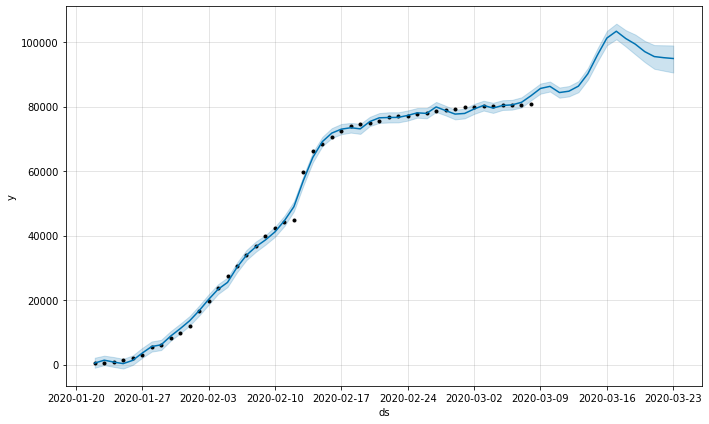

In [105]:
predict_region('China','Confirmed')

In [ ]:
# ## function that predicts still infected people for a specific region
# def predict_infected(region):
#     regions = data_grouped.Region.drop_duplicates()
#     if region in data_grouped.Region.to_numpy():
#         df = data_grouped.groupby(['Region','Date'],as_index=False)['still infected'].sum()
#         df = df.groupby('Region')['Date','still infected'].get_group(region)
#         train = df[:math.ceil((df.shape[0]*80)/100)]
#         test = df[math.ceil((df.shape[0]*80)/100):]
#         m = Prophet()
#         m.add_seasonality(name='monthly', period=30.5, fourier_order=5) ## parameters don't matter since it gives same resutls 
#         train.rename(columns = {'Date':'ds','still infected':'y'},inplace=True)
#         m.fit(train)
#         f_dates = m.make_future_dataframe(periods = len(test)+5)
#         forecast = m.predict(f_dates)
#         m.plot(forecast)

In [ ]:
# ## testing
# predict_infected('US')

In [ ]:
data_grouped.to_csv('final_data.csv')

In [ ]:
data_grouped.head()

In [ ]:
test_df = data_grouped.groupby('Region',as_index=False)['Confirmed','Deaths','Recovered','still infected'].get_group('Italy')

In [ ]:
total_region = data_grouped.groupby('Region',as_index=False)['Confirmed','Recovered','Deaths','still infected'].max()
total_region = total_region.append({'Region' : 'Worldwide',
                     'Confirmed' : total_region.Confirmed.sum(),
                     'Recovered' : total_region.Recovered.sum(),
                     'Deaths' : total_region.Deaths.sum(),
                     'still infected' : total_region['still infected'].sum()
                    },ignore_index=True)

In [ ]:
total_region.Confirmed.max()

In [ ]:
china_grouped = china.groupby(['Date','State'])['Confirmed', 'Deaths', 'Recovered', 'Lat', 'Long'].max()
china_grouped = china_grouped.reset_index()
china_grouped['size'] = china_grouped.Confirmed.pow(0.5)
china_grouped['Date'] = china_grouped['Date'].dt.strftime('%m/%d/%Y')

In [ ]:
def mapBox(region,status):
    map_access_token = 'pk.eyJ1Ijoib3Vzc2FtYWxoIiwiYSI6ImNrOXE5YjhyeTBpMXMzbm1tNzl6c3YycG8ifQ.ItAzwdmH4IXBfK8op6rptg'
    px.set_mapbox_access_token(map_access_token)
    df = data_grouped.groupby('Region',as_index=False)['Date','State','Confirmed','Deaths',
                                                       'Recovered','Lat','Long'].get_group(str(region))
    df = df.groupby(['Date','State'])['Confirmed','Deaths','Recovered','Lat','Long'].max()
    df = df.reset_index()
    df['size'] = df[str(status)].pow(0.5)
#     df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')
    fig = px.scatter_mapbox(df,
                            lat="Lat",
                            lon="Long",
                            color="Confirmed",
                            size="size",
                            zoom = 3,
                            color_continuous_scale=["#FA9090", "#F77A7A", "#F56666", "#F15454", "#ED4343"],
                            hover_data = ['Confirmed','Recovered','Deaths'],
                            size_max=40)
    return fig

In [ ]:
mapBox('China','Confirmed').show()

In [ ]:
map_access_token = 'pk.eyJ1Ijoib3Vzc2FtYWxoIiwiYSI6ImNrOXE5YjhyeTBpMXMzbm1tNzl6c3YycG8ifQ.ItAzwdmH4IXBfK8op6rptg'
px.set_mapbox_access_token(map_access_token)
df = data_grouped.groupby(['Region',as_index=False])['Date','Confirmed','Deaths','Recovered','Lat','Long'].get_group('')
df = df.groupby(['Date'])['Confirmed','Deaths','Recovered','Lat','Long'].max()
df = df.reset_index()
df['size'] = df['Confirmed'].pow(0.5)
#     df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')
fig = px.scatter_mapbox(df,
                        lat="Lat",
                        lon="Long",
                        color="Confirmed",
                        size="size",
                        zoom = 3,
                        color_continuous_scale=["#FA9090", "#F77A7A", "#F56666", "#F15454", "#ED4343"],
                        hover_data = ['Confirmed'],
                        size_max=40)
fig.show()
    

In [ ]:
from datetime import datetime
total_region = data_grouped.groupby(['Region','State'], as_index=False)[
    'Date','Confirmed', 'Recovered', 'Deaths', 'still infected', 'Lat', 'Long'].max()
total_region = total_region.append({'Region': 'Worldwide',
                                    'Date': datetime.strptime('2020-03-10', '%Y-%m-%d').date(),
                                    'State' : 'NaN',
                                    'Confirmed': total_region.Confirmed.sum(),
                                    'Recovered': total_region.Recovered.sum(),
                                    'Deaths': total_region.Deaths.sum(),
                                    'still infected': total_region['still infected'].sum(),
                                    'Lat': '28.3605',
                                    'Long': '81.5101'
                                    }, ignore_index=True)

In [ ]:
map_access_token = 'pk.eyJ1Ijoib3Vzc2FtYWxoIiwiYSI6ImNrOXE5YjhyeTBpMXMzbm1tNzl6c3YycG8ifQ.ItAzwdmH4IXBfK8op6rptg'
px.set_mapbox_access_token(map_access_token)
df = data_grouped.groupby(['Region','State','Date'])['Confirmed', 'Recovered', 'Deaths', 'Lat', 'Long'].max()
df = df.reset_index()
df['size'] = df['Confirmed'].pow(0.5)
fig = px.scatter_mapbox(df,
                        lat="Lat",
                        lon="Long",
                        color="Confirmed",
                        size="size",
                        zoom = 3,
                        color_continuous_scale=["#FA9090", "#F77A7A", "#F56666", "#F15454", "#ED4343"],
                        hover_data = ['Confirmed'],
                        size_max=40)
fig.show()

In [ ]:
diff = []
indexing = list(df.index)
for i,j in zip(indexing,indexing[1:-1]):
    diff.append(df.Confirmed.loc[j]-df.Confirmed.loc[i])

In [ ]:
diff[0] = df.Confirmed[0]
diff[46] = df.Confirmed.tolist()[-1] - df.Confirmed.tolist()[-2]

In [ ]:
df1 = data_grouped.groupby(['Region','Date'],as_index=False)['Confirmed','Deaths','Recovered','still infected'].sum()
df1.head()

In [ ]:
test = df1.groupby(['Region','Date'],as_index=False)['Confirmed','Recovered','Deaths','still infected'].sum()
test = test.groupby('Date',as_index=False)['Confirmed','Recovered','Deaths','still infected'].sum()
for i in range(0,46):
    df1 = df1.append({'Region': 'Worldwide',
            'Date': test.Date.loc[i],
            'Confirmed': test.Confirmed.loc[i],
            'Recovered': test.Recovered.loc[i],
            'Deaths': test.Deaths.loc[i],
            'still infected': test['still infected'].loc[i]
            }, ignore_index=True)

In [ ]:
dataframe = df1.groupby(['Region','Date'],as_index=False)["Confirmed",'Deaths','Recovered','still infected'].sum()
dataframe.tail()

In [ ]:
total_region = data_grouped.groupby(['Region', 'Date'], as_index=False)[
    'State', 'Confirmed', 'Recovered', 'Deaths', 'still infected'].sum()
test = total_region.groupby(['Region', 'Date'], as_index=False)[
    'Confirmed', 'Recovered', 'Deaths', 'still infected'].sum()
test = test.groupby('Date', as_index=False)['Confirmed', 'Recovered', 'Deaths', 'still infected'].sum()
for i in range(0, 46):
    total_region = total_region.append({'Region': 'Worldwide',
                                        'Date': test.Date.loc[i],
                                        'Confirmed': test.Confirmed.loc[i],
                                        'Recovered': test.Recovered.loc[i],
                                        'Deaths': test.Deaths.loc[i],
                                        'still infected': test['still infected'].loc[i]
                                        }, ignore_index=True)

In [ ]:
total_region.tail()

In [ ]:
cum_df = total_region.groupby('Region',as_index=False)[
    'Date','Confirmed','Recovered','Deaths','still infected'].get_group('China')
cum_df.tail()

In [ ]:
import datetime

In [ ]:
for k in cum_df.columns[1:]:
    diff = []
    test_list = []
    indexing = list(cum_df.index)
    for i,j in zip(indexing,indexing[1:-1]):
        diff.append(cum_df[str(k)].loc[j]-cum_df[str(k)].loc[i])
    test_list.append(cum_df[str(k)].tolist()[0])
    for c in diff:
        test_list.append(c)
    test_list.append(cum_df[str(k)].tolist()[-1] - cum_df[str(k)].tolist()[-2])
    cum_df['daily_' + str(k)] = test_list

In [ ]:
world = data_grouped.groupby('Region',as_index=False)['Lat','Long','Date','Confirmed','Recovered','Deaths','still infected']
world.head()